In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
from math import sqrt

In [2]:
# 1. Load Dataset
url = "HousingData.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
# 1. Load Dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:

df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [11]:
# 2. Data Preprocessing (Normalize)
features = df.drop('medv', axis=1)
target = df['medv']

In [12]:
# Check columns
print("Columns:", df.columns)

Columns: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [13]:
# 2. Data Preprocessing
X = df.drop('medv', axis=1)  # Features
y = df['medv']

In [15]:
from sklearn.preprocessing import StandardScaler


In [16]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)


In [18]:
# 3. Linear Regression (from scratch)
class LinearRegressionScratch:
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

In [19]:
# Train and Evaluate Linear Regression
lr = LinearRegressionScratch()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}\n")


Linear Regression:
RMSE: 4.93
R2 Score: 0.67



In [21]:
# 4. Random Forest Regressor (Simple Version from Scratch)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regressor:")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}\n")

Random Forest Regressor:
RMSE: 2.81
R2 Score: 0.89



In [22]:
# 5. XGBoost Regressor (Using XGBoost)
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Regressor:")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb):.2f}\n")

XGBoost Regressor:
RMSE: 2.56
R2 Score: 0.91



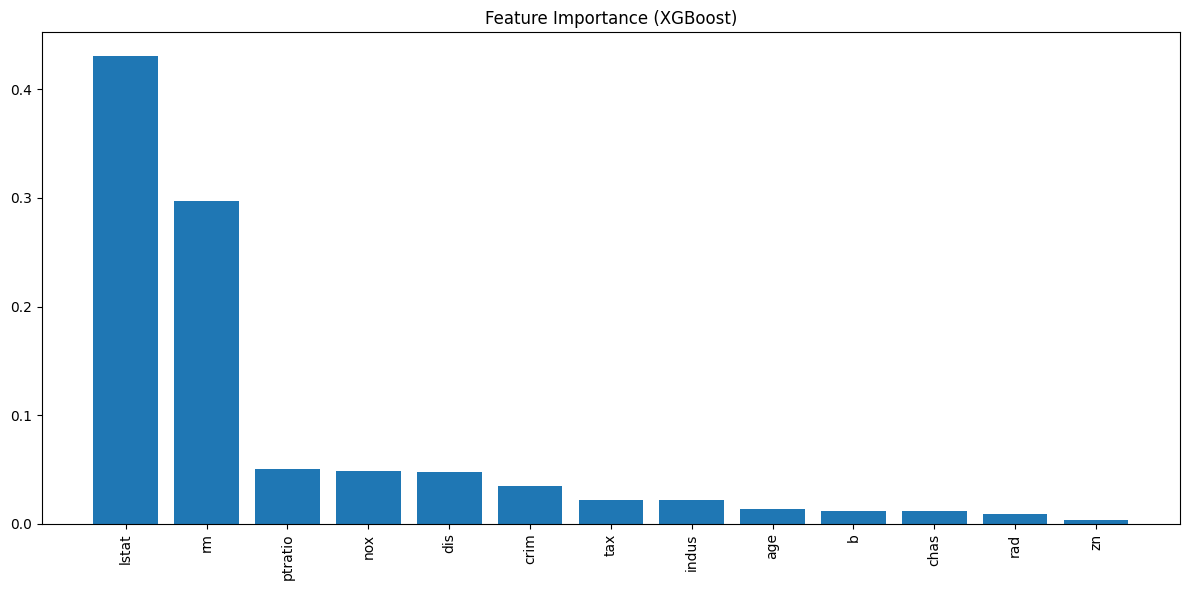

In [23]:
# 6. Feature Importance Plot (for XGBoost)
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importance (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features_names[indices], rotation=90)
plt.tight_layout()
plt.show()

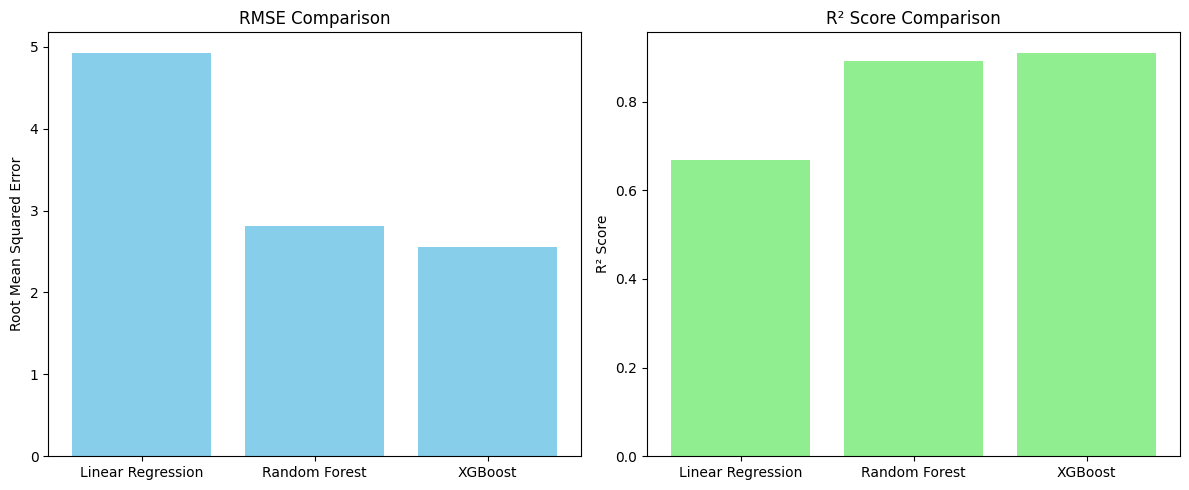

In [25]:
# Store evaluation results
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
}

results_df = pd.DataFrame(results)

# Plot RMSE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.title("RMSE Comparison")
plt.ylabel("Root Mean Squared Error")

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['R2'], color='lightgreen')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()
